In [2]:
from datasets import load_dataset
from dotenv import load_dotenv
import os
from huggingface_hub import login
import pandas as pd
from generator_flow import generator
from generator_flow import normal_generator
from generator_flow import post_processing

Load examples

In [2]:
load_dotenv()
login(os.getenv("HF_API_KEY"))
#dataset = load_dataset("Tamiza/zimpl_data") #for validation
dataset = load_dataset("Tamiza/test_zimpl_dataset") #for test
df_manual = dataset['test'].to_pandas()
dataset

DatasetDict({
    test: Dataset({
        features: ['input', 'output', 'parameter', 'solution'],
        num_rows: 4200
    })
})

Table for manual tests

In [3]:
df_manual


,input,output,parameter,solution
0,"- Cheesecake A:\n - 230g of flour, 50g of but...",var x1; # Cheesecake 'A'\nvar x2; # Cheesecake...,0,objective value: ...
1,"- Brownie A:\n - 180g of flour, 45g of chocol...",var x1; # Brownie 'A'\nvar x2; # Brownie 'B'\n...,0,objective value: 25.925925...
2,"- Solutions Produced:\n - A: 2 X, 1 Y, 3 Z ($...",var x1; # weekly production quantity of soluti...,0,objective value: 185.71428...
3,Determine the optimal mix of Ore A (350 PLN pe...,var x1; # tons of ore A\nvar x2; # tons of ore...,0,objective value: ...
4,"- Ch1:\n - 3 C, 2 S, 1 M\n - Profit: $4/unit...",var x1; # weekly production of chocolate Ch1\n...,0,objective value: ...
...,...,...,...,...
4195,The company is tasked with maximizing profits ...,"set ApplianceTypes := {""Vacuum Cleaner"", ""Air ...",1,objective value: ...
4196,"- Vacuum Cleaner:\n - Assembly time: 2 hours,...","set ApplianceTypes := {""Vacuum Cleaner"", ""Air ...",1,objective value: ...
4197,- Appliance Options:\n - Vacuum Cleaner: 2 ho...,"set ApplianceTypes := {""Vacuum Cleaner"", ""Air ...",1,objective value: ...
4198,A company manufactures two types of home appli...,"set ApplianceTypes := {""Vacuum Cleaner"", ""Air ...",1,objective value: ...


Generate responses using AI ZIMPL Generator (for now first 10)

In [4]:
import time
batch_size = 500
total_rows = len(df_manual)

for start in range(3000, total_rows, batch_size):
    #if start < 1500: continue
    end = start + batch_size
    batch = df_manual.iloc[start:end]

    batch['ai_advanced'] = batch.apply(
        lambda row: post_processing(generator(row['input'], row['parameter'])),
        axis=1
    )

    df_manual.loc[start:end, 'ai_advanced'] = batch['ai_advanced']

    batch[['input', 'output', 'ai_advanced']].to_excel(
        f"batch\\batch_{start}_{end}.xlsx", 
        index=False
    )
    print(f"Batch {start}-{end} processed.")

C:\Users\jagod\AppData\Local\Temp\ipykernel_23076\87284043.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch['ai_advanced'] = batch.apply(


Batch 3000-3500 processed.


C:\Users\jagod\AppData\Local\Temp\ipykernel_23076\87284043.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch['ai_advanced'] = batch.apply(


Batch 3500-4000 processed.
Batch 4000-4500 processed.


C:\Users\jagod\AppData\Local\Temp\ipykernel_23076\87284043.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch['ai_advanced'] = batch.apply(


Show answers

In [5]:
df_manual[:1].map(lambda x: str(x)).style.set_properties(**{'text-align': 'left', 'white-space': 'pre-wrap'})

,input,output,parameter,solution,ai_advanced
0,"- Cheesecake A: - 230g of flour, 50g of butter - Cheesecake B: - 220g of flour, 60g of butter - Resources: - Flour: 6000g, Butter: 900g - Goal: Maximize total cheesecake production.",var x1; # Cheesecake 'A' var x2; # Cheesecake 'B' maximize f: x1 + x2; subto flour: 230*x1 + 220*x2 <= 6000; subto butter: 50*x1 + 60*x2 <= 900;,0,objective value: 18 x1 18 (obj:1),nan


In [6]:
batch_size = 500
total_rows = len(df_manual)

for start in range(0, total_rows, batch_size):
    end = start + batch_size
    batch = df_manual.iloc[start:end]

    batch['ai_normal'] = batch['input'].apply(normal_generator)

    df_manual.loc[start:end, 'ai_normal'] = batch['ai_normal']

    batch[['input', 'output', 'ai_normal']].to_excel(
        f"batch\\batch_normal_{start}_{end}.xlsx",
        index=False
    )
    print(f"Batch {start}-{end} processed and saved as 'batch_normal_{start}_{end}.xlsx'.")

print("Przetwarzanie batchowe dla 'ai_normal' zakończone i wszystkie pliki zostały zapisane.")


C:\Users\jagod\AppData\Local\Temp\ipykernel_23076\3499303035.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch['ai_normal'] = batch['input'].apply(normal_generator)


Batch 0-500 processed and saved as 'batch_normal_0_500.xlsx'.


C:\Users\jagod\AppData\Local\Temp\ipykernel_23076\3499303035.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch['ai_normal'] = batch['input'].apply(normal_generator)


Batch 500-1000 processed and saved as 'batch_normal_500_1000.xlsx'.


C:\Users\jagod\AppData\Local\Temp\ipykernel_23076\3499303035.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch['ai_normal'] = batch['input'].apply(normal_generator)


Batch 1000-1500 processed and saved as 'batch_normal_1000_1500.xlsx'.


C:\Users\jagod\AppData\Local\Temp\ipykernel_23076\3499303035.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch['ai_normal'] = batch['input'].apply(normal_generator)


Batch 1500-2000 processed and saved as 'batch_normal_1500_2000.xlsx'.


C:\Users\jagod\AppData\Local\Temp\ipykernel_23076\3499303035.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch['ai_normal'] = batch['input'].apply(normal_generator)


Batch 2000-2500 processed and saved as 'batch_normal_2000_2500.xlsx'.


C:\Users\jagod\AppData\Local\Temp\ipykernel_23076\3499303035.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch['ai_normal'] = batch['input'].apply(normal_generator)


Batch 2500-3000 processed and saved as 'batch_normal_2500_3000.xlsx'.


C:\Users\jagod\AppData\Local\Temp\ipykernel_23076\3499303035.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch['ai_normal'] = batch['input'].apply(normal_generator)


Batch 3000-3500 processed and saved as 'batch_normal_3000_3500.xlsx'.


C:\Users\jagod\AppData\Local\Temp\ipykernel_23076\3499303035.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch['ai_normal'] = batch['input'].apply(normal_generator)


Batch 3500-4000 processed and saved as 'batch_normal_3500_4000.xlsx'.
Batch 4000-4500 processed and saved as 'batch_normal_4000_4500.xlsx'.
Przetwarzanie batchowe dla 'ai_normal' zakończone i wszystkie pliki zostały zapisane.


C:\Users\jagod\AppData\Local\Temp\ipykernel_23076\3499303035.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch['ai_normal'] = batch['input'].apply(normal_generator)


In [54]:
import glob
import pandas as pd
from datasets import load_dataset

dataset = load_dataset("Tamiza/test_zimpl_dataset")
df_manual = dataset['test'].to_pandas()

all_files = glob.glob("batch\\batch_*.xlsx")
advanced_files = [file for file in all_files if 'ai_advanced' in pd.read_excel(file).columns]
normal_files = [file for file in all_files if 'ai_normal' in pd.read_excel(file).columns]

df_advanced = pd.concat([pd.read_excel(file) for file in advanced_files], ignore_index=True)
df_normal = pd.concat([pd.read_excel(file) for file in normal_files], ignore_index=True)

df_batches = pd.merge(df_advanced, df_normal, on='input', suffixes=('_advanced', '_normal'))
df_batches = df_batches.drop(columns=['output_advanced', 'output_normal'])

df_manual = pd.merge(df_manual, df_batches, on='input', how='left')

df_manual.to_excel("batch\\final_merged_dataset.xlsx", index=False)
print("Złączony DataFrame zapisany do pliku 'final_merged_dataset.xlsx'.")

print(df_manual.head())

Złączony DataFrame zapisany do pliku 'final_merged_dataset.xlsx'.
                                               input  \
0  - Cheesecake A:\n  - 230g of flour, 50g of but...   
1  - Brownie A:\n  - 180g of flour, 45g of chocol...   
2  - Solutions Produced:\n  - A: 2 X, 1 Y, 3 Z ($...   
3  Determine the optimal mix of Ore A (350 PLN pe...   
4  - Ch1:\n  - 3 C, 2 S, 1 M\n  - Profit: $4/unit...   

                                              output  parameter  \
0  var x1; # Cheesecake 'A'\nvar x2; # Cheesecake...          0   
1  var x1; # Brownie 'A'\nvar x2; # Brownie 'B'\n...          0   
2  var x1; # weekly production quantity of soluti...          0   
3  var x1; # tons of ore A\nvar x2; # tons of ore...          0   
4  var x1; # weekly production of chocolate Ch1\n...          0   

                                            solution  \
0  objective value:                              ...   
1  objective value:                     25.925925...   
2  objective value:       

In [3]:
df_manual = pd.read_excel("batch\\final_merged_dataset.xlsx")

In [4]:
from pandas import DataFrame
df_manual[:1][['output', 'ai_advanced', 'ai_normal']].map(lambda x: str(x)).style.set_properties(**{'text-align': 'left', 'white-space': 'pre-wrap'})

,output,ai_advanced,ai_normal
0,var x1; # Cheesecake 'A' var x2; # Cheesecake 'B' maximize f: x1 + x2; subto flour: 230*x1 + 220*x2 <= 6000; subto butter: 50*x1 + 60*x2 <= 900;,# Decision variables var cA integer; # Number of Cheesecake A produced var cB integer; # Number of Cheesecake B produced # Objective function maximize total_production: cA + cB; # Constraints subto flour: 230*cA + 220*cB <= 6000; subto butter: 50*cA + 60*cB <= 900;,var xA; # number of Cheesecake A var xB; # number of Cheesecake B # Objective: Maximize total cheesecake production maximize: xA + xB; # Constraints s.t. flour_constraint: 230 * xA + 220 * xB <= 6000; # flour constraint s.t. butter_constraint: 50 * xA + 60 * xB <= 900; # butter constraint # Non-negativity constraints xA >= 0; xB >= 0;


## Solver results

In [5]:
from solver import run_scip_and_extract_solution
SCIP_PATH = r"C:\\Program Files\\SCIPOptSuite 9.1.0\\bin"

df_manual["ai_advanced"] = df_manual["ai_advanced"].astype(str)
df_manual["ai_normal"] = df_manual["ai_normal"].astype(str)

def process_zimpl_code(zimpl_code):
    try:
        valid, result = run_scip_and_extract_solution(zimpl_code, SCIP_PATH)
        #print(f"Valid: {valid}, Result: {result}")
        return valid, result
    except Exception as e:
        #print(f"Error processing code: {e}")
        return False, None



df_manual[["valid_advanced", "result_advanced"]] = df_manual["ai_advanced"].apply(
    lambda code: pd.Series(process_zimpl_code(code))
)

df_manual[["valid_normal", "result_normal"]] = df_manual["ai_normal"].apply(
    lambda code: pd.Series(process_zimpl_code(code))
)

Is Valid: True

Solution:
objective value:                                210.6
x$Caramel                                         120 	(obj:0.88)
x$ChocolateChip                                   140 	(obj:0.75)


## Compare validation

In [6]:
import pandas as pd

print("ZIMPL generator results")
comparison_table = pd.DataFrame({
    "Category": [
        "Valid (True)",
        "Not Valid (False)",
    ],
    "Count": [
        (df_manual["valid_advanced"] == True).sum(),
        (df_manual["valid_advanced"] == False).sum(),
    ]
})

comparison_table["Percentage"] = (
    comparison_table["Count"] / len(df_manual) * 100
).round(2)

print(comparison_table)

print("ZIMPL generator results - hardcoded")
comparison_table = pd.DataFrame({
    "Category": [
        "Valid hardcoded (True)",
        "Not Valid hardcoded (False)",
    ],
    "Count": [
        ((df_manual["valid_advanced"] == True) & (df_manual["parameter"] == 0)).sum(),
        ((df_manual["valid_advanced"] == False) & (df_manual["parameter"] == 0)).sum(),
    ]
})

comparison_table["Percentage"] = (
    comparison_table["Count"] / comparison_table["Count"].sum() * 100
).round(2)

print(comparison_table)

print("ZIMPL generator results - params")
comparison_table = pd.DataFrame({
    "Category": [
        "Valid with params (True)",
        "Not Valid with params (False)"
    ],
    "Count": [
        ((df_manual["valid_advanced"] == True) & (df_manual["parameter"] == 1)).sum(),
        ((df_manual["valid_advanced"] == False) & (df_manual["parameter"] == 1)).sum(),
    ]
})

comparison_table["Percentage"] = (
    comparison_table["Count"] / comparison_table["Count"].sum() * 100
).round(2)

print(comparison_table)

print("Normal OpenAI model results")
comparison_table_normal = pd.DataFrame({
    "Category": [
        "Valid (True)",
        "Not Valid (False)",
    ],
    "Count": [
        (df_manual["valid_normal"] == True).sum(),
        (df_manual["valid_normal"] == False).sum(),
    ]
})

comparison_table_normal["Percentage"] = (
    comparison_table_normal["Count"] / len(df_manual) * 100
).round(2)

print(comparison_table_normal)

print("All results")
comparison_table = pd.DataFrame({
    "Category": [
        "Both Valid (True, True)",
        "Advanced Valid Only (True, False)",
        "Normal Valid Only (False, True)",
        "Both Invalid (False, False)",
    ],
    "Count": [
        ((df_manual["valid_advanced"] == True) & (df_manual["valid_normal"] == True)).sum(),
        ((df_manual["valid_advanced"] == True) & (df_manual["valid_normal"] == False)).sum(),
        ((df_manual["valid_advanced"] == False) & (df_manual["valid_normal"] == True)).sum(),
        ((df_manual["valid_advanced"] == False) & (df_manual["valid_normal"] == False)).sum(),
    ]
})

comparison_table["Percentage"] = (
    comparison_table["Count"] / len(df_manual) * 100
).round(2)

print(comparison_table)


ZIMPL generator results
            Category  Count  Percentage
0       Valid (True)   3787       88.07
1  Not Valid (False)    513       11.93
ZIMPL generator results - hardcoded
                      Category  Count  Percentage
0       Valid hardcoded (True)   2129       93.58
1  Not Valid hardcoded (False)    146        6.42
ZIMPL generator results - params
                        Category  Count  Percentage
0       Valid with params (True)   1658       81.88
1  Not Valid with params (False)    367       18.12
Normal OpenAI model results
            Category  Count  Percentage
0       Valid (True)      0         0.0
1  Not Valid (False)   4300       100.0
All results
                            Category  Count  Percentage
0            Both Valid (True, True)      0        0.00
1  Advanced Valid Only (True, False)   3787       88.07
2    Normal Valid Only (False, True)      0        0.00
3        Both Invalid (False, False)    513       11.93


In [7]:
import pandas as pd

notvalid_rows_advanced = df_manual[df_manual['valid_advanced'] == False]
selected_columns = notvalid_rows_advanced[['output', 'ai_advanced', 'ai_normal']]
selected_columns.to_excel('not_valid.xlsx', index=False, engine='openpyxl')

print("Dane zostały zapisane w formacie XLSX do pliku not_valid.xlsx.")


Dane zostały zapisane w formacie XLSX do pliku not_valid.xlsx.


In [8]:
from IPython.display import display, HTML

df_manual["ai_advanced_display"] = df_manual["ai_advanced"].str.replace('\n', '<br>', regex=False)

html_content = df_manual["ai_advanced_display"].apply(lambda x: f'<div>{x}</div>').to_list()
#display(HTML(''.join(html_content)))

Check valid rows and search for correct results in advanced ZIMPL creator

In [9]:
from obj_fun_validator import compare_solutions

valid_rows_advanced = df_manual[df_manual['valid_advanced'] == True]
#valid_rows_advanced.to_excel("aaa.xlsx", index=False)
notvalid_rows_advanced = df_manual[df_manual['valid_advanced'] == False]
#print(valid_rows_advanced["result_advanced"])
#print(notvalid_rows_advanced["result_advanced"])

df_manual.loc[valid_rows_advanced.index, 'compare_advanced'] = valid_rows_advanced.apply(
    lambda row: compare_solutions(row['solution'], row['result_advanced'])[0], axis=1
)

valid_count = len(valid_rows_advanced)

#print(f"valid_advanced == True: {valid_count}")
#print(df_manual['compare_advanced'])

total_count = len(df_manual)
nan_count = df_manual['compare_advanced'].isna().sum()
true_count = (df_manual['compare_advanced'] == True).sum()
false_count = (df_manual['compare_advanced'] == False).sum()

nan_percentage = (nan_count / total_count) * 100
true_percentage = (true_count / total_count) * 100
false_percentage = (false_count / total_count) * 100

print(f"All stats:")
print(f"True: {true_count} ({true_percentage:.2f}%)")
print(f"False: {false_count} ({false_percentage:.2f}%)")
print(f"NaN: {nan_count} ({nan_percentage:.2f}%)")

non_nan_rows = df_manual.loc[~df_manual['compare_advanced'].isna()]
true_non_nan_count = (non_nan_rows['compare_advanced'] == True).sum()
false_non_nan_count = (non_nan_rows['compare_advanced'] == False).sum()

true_non_nan_percentage = (true_non_nan_count / valid_count) * 100
false_non_nan_percentage = (false_non_nan_count / valid_count) * 100

print(f"\nStats without NaN (valid_count = {valid_count}):")
print(f"True: {true_non_nan_count} ({true_non_nan_percentage:.2f}%)")
print(f"False: {false_non_nan_count} ({false_non_nan_percentage:.2f}%)")

#notvalid_rows_advanced["ai_advanced"].head(10)


All stats:
True: 2620 (60.93%)
False: 1167 (27.14%)
NaN: 513 (11.93%)

Stats without NaN (valid_count = 3787):
True: 2620 (69.18%)
False: 1167 (30.82%)


C:\Users\jagod\AppData\Local\Temp\ipykernel_23492\2645798765.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ True False False ...  True  True  True]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_manual.loc[valid_rows_advanced.index, 'compare_advanced'] = valid_rows_advanced.apply(


In [12]:
import pandas as pd

# All stats - detailed
nan_count = df_manual['compare_advanced'].isna().sum()
true_count = (df_manual['compare_advanced'] == True).sum()
false_count = (df_manual['compare_advanced'] == False).sum()
total_count = len(df_manual)

nan_percentage = (nan_count / total_count) * 100
true_percentage = (true_count / total_count) * 100
false_percentage = (false_count / total_count) * 100

print("All stats:")
print(f"True: {true_count} ({true_percentage:.2f}%)")
print(f"False: {false_count} ({false_percentage:.2f}%)")
print(f"NaN: {nan_count} ({nan_percentage:.2f}%)")

# Stats with hardcoded and params split
true_hardcoded = ((df_manual['compare_advanced'] == True) & (df_manual['parameter'] == 0)).sum()
true_params = ((df_manual['compare_advanced'] == True) & (df_manual['parameter'] == 1)).sum()

false_hardcoded = ((df_manual['compare_advanced'] == False) & (df_manual['parameter'] == 0)).sum()
false_params = ((df_manual['compare_advanced'] == False) & (df_manual['parameter'] == 1)).sum()

nan_hardcoded = (df_manual['compare_advanced'].isna() & (df_manual['parameter'] == 0)).sum()
nan_params = (df_manual['compare_advanced'].isna() & (df_manual['parameter'] == 1)).sum()

total_hardcoded = true_hardcoded + false_hardcoded + nan_hardcoded
total_params = true_params + false_params + nan_params

print("Detailed stats with hardcoded and params:")
comparison_table = pd.DataFrame({
    "Category": [
        "True (Hardcoded)",
        "False (Hardcoded)",
        "NaN (Hardcoded)",
        "True (Params)",
        
        "False (Params)",
        
        "NaN (Params)",
    ],
    "Count": [
        true_hardcoded,
        false_hardcoded,
        nan_hardcoded,
        true_params,
        
        false_params,
        
        nan_params,
    ],
    "Percentage": [
        (true_hardcoded / total_hardcoded * 100 if total_hardcoded > 0 else 0),
        (false_hardcoded / total_hardcoded * 100 if total_hardcoded > 0 else 0),
        (nan_hardcoded / total_hardcoded * 100 if total_hardcoded > 0 else 0),
        (true_params / total_params * 100 if total_params > 0 else 0),
        
        (false_params / total_params * 100 if total_params > 0 else 0),
        
        (nan_params / total_params * 100 if total_params > 0 else 0),
    ]
})

print(comparison_table)


All stats:
True: 2620 (60.93%)
False: 1167 (27.14%)
NaN: 513 (11.93%)
Detailed stats with hardcoded and params:
            Category  Count  Percentage
0   True (Hardcoded)   1365   60.000000
1  False (Hardcoded)    764   33.582418
2    NaN (Hardcoded)    146    6.417582
3      True (Params)   1255   61.975309
4     False (Params)    403   19.901235
5       NaN (Params)    367   18.123457


In [13]:
true_count = (df_manual['compare_advanced'] == True).sum()
false_count = (df_manual['compare_advanced'] == False).sum()
total_count = len(df_manual)

true_percentage = (true_count / total_count) * 100
false_percentage = (false_count / total_count) * 100

print("All stats (ignoring NaN):")
print(f"True: {true_count} ({true_percentage:.2f}%)")
print(f"False: {false_count} ({false_percentage:.2f}%)")

# Stats with hardcoded and params split
true_hardcoded = ((df_manual['compare_advanced'] == True) & (df_manual['parameter'] == 0)).sum()
true_params = ((df_manual['compare_advanced'] == True) & (df_manual['parameter'] == 1)).sum()

false_hardcoded = ((df_manual['compare_advanced'] == False) & (df_manual['parameter'] == 0)).sum()
false_params = ((df_manual['compare_advanced'] == False) & (df_manual['parameter'] == 1)).sum()

total_hardcoded = true_hardcoded + false_hardcoded
total_params = true_params + false_params

print("Detailed stats with hardcoded and params (ignoring NaN):")
comparison_table = pd.DataFrame({
    "Category": [
        "True (Hardcoded)",
        "False (Hardcoded)",
        "True (Params)",
        "False (Params)",
    ],
    "Count": [
        true_hardcoded,
        false_hardcoded,
        true_params,
        false_params,
    ],
    "Percentage": [
        (true_hardcoded / total_hardcoded * 100 if total_hardcoded > 0 else 0),
        (false_hardcoded / total_hardcoded * 100 if total_hardcoded > 0 else 0),
        (true_params / total_params * 100 if total_params > 0 else 0),
        (false_params / total_params * 100 if total_params > 0 else 0),
    ]
})

print(comparison_table)

All stats (ignoring NaN):
True: 2620 (60.93%)
False: 1167 (27.14%)
Detailed stats with hardcoded and params (ignoring NaN):
            Category  Count  Percentage
0   True (Hardcoded)   1365   64.114608
1  False (Hardcoded)    764   35.885392
2      True (Params)   1255   75.693607
3     False (Params)    403   24.306393


Check valid rows and search for correct results in normal GPT model

In [46]:
valid_rows_normal = df_manual[df_manual['valid_normal'] == True]
#print(valid_rows["result_normal"])

df_manual.loc[valid_rows_normal.index, 'compare_normal'] = valid_rows_normal.apply(
    lambda row: compare_solutions(row['solution'], row['result_normal'])[0], axis=1
)

valid_count = len(valid_rows_normal)

#print(f"valid_normal == True: {valid_count}")
#print(df_manual['compare_normal'])

total_count = len(df_manual)
nan_count = df_manual['compare_normal'].isna().sum()
true_count = (df_manual['compare_normal'] == True).sum()
false_count = (df_manual['compare_normal'] == False).sum()

nan_percentage = (nan_count / total_count) * 100
true_percentage = (true_count / total_count) * 100
false_percentage = (false_count / total_count) * 100

print(f"All stats:")
print(f"NaN: {nan_count} ({nan_percentage:.2f}%)")
print(f"True: {true_count} ({true_percentage:.2f}%)")
print(f"False: {false_count} ({false_percentage:.2f}%)")

non_nan_rows = df_manual.loc[~df_manual['compare_normal'].isna()]
true_non_nan_count = (non_nan_rows['compare_normal'] == True).sum()
false_non_nan_count = (non_nan_rows['compare_normal'] == False).sum()

if valid_count == 0:
    true_non_nan_percentage = (true_non_nan_count / valid_count) * 100
    false_non_nan_percentage = (false_non_nan_count / valid_count) * 100
else:
    true_non_nan_percentage = 0
    false_non_nan_percentage = 0

print(f"\nStats without NaN (valid_count = {valid_count}):")
print(f"True: {true_non_nan_count} ({true_non_nan_percentage:.2f}%)")
print(f"False: {false_non_nan_count} ({false_non_nan_percentage:.2f}%)")

All stats:
NaN: 4434 (100.00%)
True: 0 (0.00%)
False: 0 (0.00%)

Stats without NaN (valid_count = 0):
True: 0 (nan%)
False: 0 (nan%)


C:\Users\jagod\AppData\Local\Temp\ipykernel_23076\2408835528.py:32: RuntimeWarning: invalid value encountered in scalar divide
  true_non_nan_percentage = (true_non_nan_count / valid_count) * 100
C:\Users\jagod\AppData\Local\Temp\ipykernel_23076\2408835528.py:33: RuntimeWarning: invalid value encountered in scalar divide
  false_non_nan_percentage = (false_non_nan_count / valid_count) * 100


In [59]:
df_manual.to_excel("batch\\final_merged_dataset.xlsx", index=False)

### Validate results of advanced prompting with LLM

In [67]:
from generator_flow import validate_generator

df_manual['llm_score_advanced'] = df_manual.apply(
    lambda row: validate_generator(row['output'], row['ai_advanced'], row['parameter']),
    axis=1
)

print(df_manual[['output', 'ai_advanced', 'llm_score_advanced']].head(2))

                                              output  \
0  var x1; # Cheesecake 'A'\nvar x2; # Cheesecake...   
1  var x1; # Brownie 'A'\nvar x2; # Brownie 'B'\n...   

                                         ai_advanced  \
0  # Decision variables\nvar cA integer; # Number...   
1  # Decision variables\nvar bA integer; # Number...   

                                  llm_score_advanced  
0  Total Grade: 2/4\n1. Correctly Defined Variabl...  
1  Total Grade: 2/4\n1. Correctly Defined Variabl...  


### Validate results of normal prompting with LLM

In [68]:
from generator_flow import validate_generator

df_manual['llm_score_normal'] = df_manual.apply(
    lambda row: validate_generator(row['output'], row['ai_normal'], row['parameter']),
    axis=1
)

print(df_manual[['output', 'ai_normal', 'llm_score_normal']].head(2))

                                              output  \
0  var x1; # Cheesecake 'A'\nvar x2; # Cheesecake...   
1  var x1; # Brownie 'A'\nvar x2; # Brownie 'B'\n...   

                                           ai_normal  \
0  var xA;  # number of Cheesecake A\nvar xB;  # ...   
1  var A;  # Number of Brownie A produced\nvar B;...   

                                    llm_score_normal  
0  Total Grade: 2/4\n1. Correctly Defined Variabl...  
1  Total Grade: 2/4\n1. Correctly Defined Variabl...  


In [70]:
df_manual.to_excel("batch\\final_merged_dataset.xlsx", index=False)

Create list of scores from generated results

In [71]:
import re

def convert_response_to_list(response):
    pattern = r"(\d+/\d+|\d+)"
    matches = re.findall(pattern, response)
    result = []
    for match in matches:
        if '/' in match:
            result.append(int(match.split('/')[0]))
        else:
            result.append(int(match))
    
    return result

In [72]:
import matplotlib.pyplot as plt

def get_final_grade(score_list):
    return score_list[0] if len(score_list) > 0 else None

def validate_final_grade(df, score=0, title="hardcoded"):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    filtered_df_advanced = df[df['parameter'] == score]
    filtered_df_advanced['parsed_scores'] = filtered_df_advanced['llm_score_advanced'].apply(convert_response_to_list)
    final_grades_advanced = filtered_df_advanced['parsed_scores'].apply(get_final_grade)
    average_final_grade_advanced = final_grades_advanced.mean()
    grade_distribution_advanced = final_grades_advanced.value_counts().sort_index()

    ax1.bar(grade_distribution_advanced.index, grade_distribution_advanced.values, color='skyblue')
    ax1.set_title(f'Final Grade for {title} (advanced)')
    ax1.set_xlabel('Final Grade')
    ax1.set_ylabel('Count')
    ax1.set_xticks(grade_distribution_advanced.index)

    filtered_df_normal = df[df['parameter'] == score]
    filtered_df_normal['parsed_scores'] = filtered_df_normal['llm_score_normal'].apply(convert_response_to_list)
    final_grades_normal = filtered_df_normal['parsed_scores'].apply(get_final_grade)
    average_final_grade_normal = final_grades_normal.mean()
    grade_distribution_normal = final_grades_normal.value_counts().sort_index()

    ax2.bar(grade_distribution_normal.index, grade_distribution_normal.values, color='lightgreen')
    ax2.set_title(f'Final Grade for {title} (normal)')
    ax2.set_xlabel('Final Grade')
    ax2.set_ylabel('Count')
    ax2.set_xticks(grade_distribution_normal.index)

    plt.tight_layout()
    plt.show()

    print(f"Advanced Average Final Grade:", average_final_grade_advanced)
    print(f"Advanced Grade Distribution:")
    print(grade_distribution_advanced)

    print(f"\nNormal Average Final Grade:", average_final_grade_normal)
    print(f"Normal Grade Distribution:")
    print(grade_distribution_normal)

C:\Users\jagod\AppData\Local\Temp\ipykernel_23076\4054348789.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_advanced['parsed_scores'] = filtered_df_advanced['llm_score_advanced'].apply(convert_response_to_list)
C:\Users\jagod\AppData\Local\Temp\ipykernel_23076\4054348789.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_normal['parsed_scores'] = filtered_df_normal['llm_score_normal'].apply(convert_response_to_list)


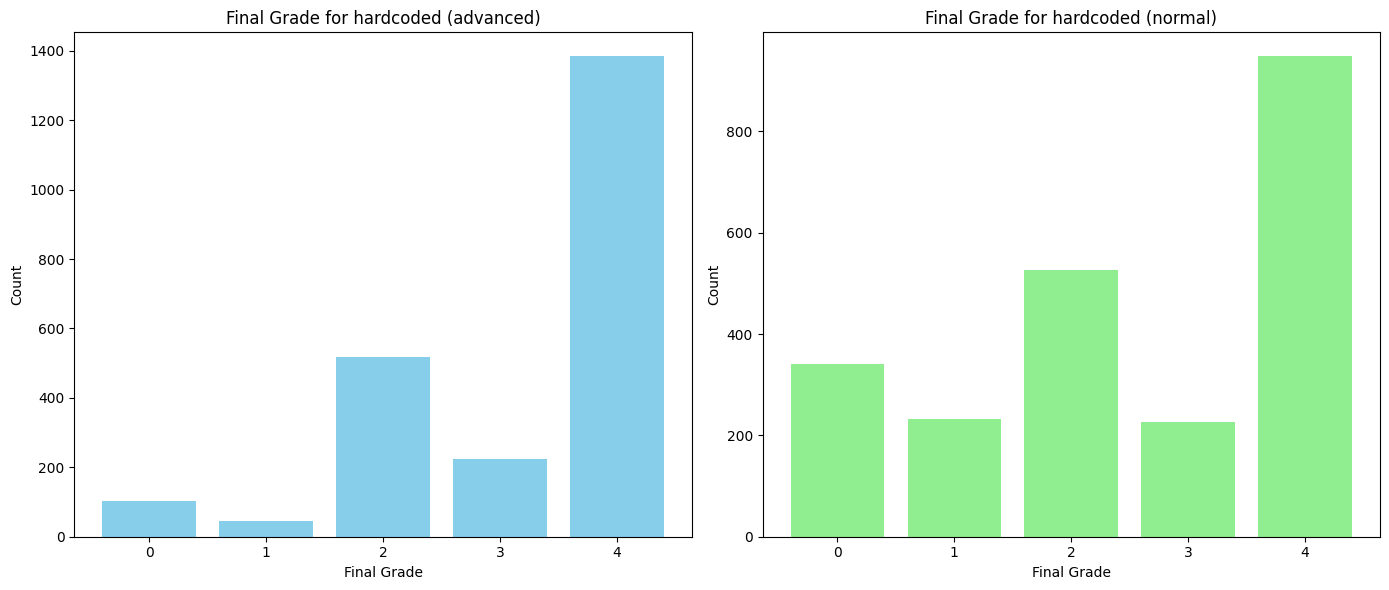

Advanced Average Final Grade: 3.2048351648351647
Advanced Grade Distribution:
parsed_scores
0     103
1      46
2     517
3     225
4    1384
Name: count, dtype: int64

Normal Average Final Grade: 2.530989010989011
Normal Grade Distribution:
parsed_scores
0    341
1    233
2    526
3    227
4    948
Name: count, dtype: int64


In [73]:
validate_final_grade(df_manual, score = 0, title = "hardcoded")

C:\Users\jagod\AppData\Local\Temp\ipykernel_23076\4054348789.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_advanced['parsed_scores'] = filtered_df_advanced['llm_score_advanced'].apply(convert_response_to_list)
C:\Users\jagod\AppData\Local\Temp\ipykernel_23076\4054348789.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_normal['parsed_scores'] = filtered_df_normal['llm_score_normal'].apply(convert_response_to_list)


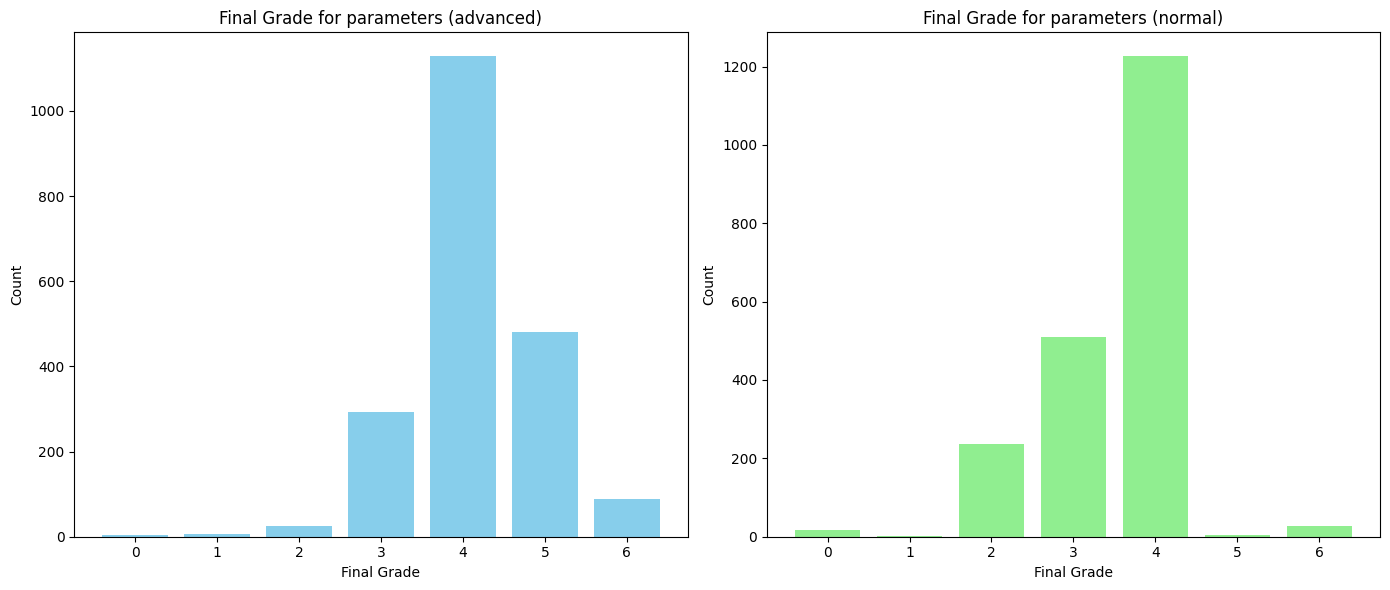

Advanced Average Final Grade: 4.138765432098765
Advanced Grade Distribution:
parsed_scores
0       3
1       7
2      25
3     293
4    1128
5     481
6      88
Name: count, dtype: int64

Normal Average Final Grade: 3.5076543209876543
Normal Grade Distribution:
parsed_scores
0      18
1       1
2     236
3     511
4    1226
5       5
6      28
Name: count, dtype: int64


In [74]:
validate_final_grade(df_manual, score = 1, title = "parameters")

In [75]:
def get_final_grade(score_list, category_index):
    if len(score_list) > category_index:
        return score_list[category_index]
    else:
        return None

def validate_final_grade(df, score=0, title="hardcoded"):
    categories_param_1 = ['Sets', 'Parameters', 'Decision Variables', 'Objective Function', 'Constraints', 'Miscellaneous']
    categories_param_0 = ['Variables', 'Objective Function', 'Constraints', 'Miscellaneous']
    
    categories = categories_param_1 if score == 1 else categories_param_0

    fig, axes = plt.subplots(len(categories), 2, figsize=(14, len(categories) * 6))

    for idx, category in enumerate(categories):
        filtered_df_advanced = df[df['parameter'] == score]
        filtered_df_advanced['parsed_scores'] = filtered_df_advanced['llm_score_advanced'].apply(convert_response_to_list)
        final_grades_advanced = filtered_df_advanced['parsed_scores'].apply(lambda x: get_final_grade(x, idx+1))
        grade_distribution_advanced = final_grades_advanced.value_counts().sort_index()

        filtered_df_normal = df[df['parameter'] == score]
        filtered_df_normal['parsed_scores'] = filtered_df_normal['llm_score_normal'].apply(convert_response_to_list)
        final_grades_normal = filtered_df_normal['parsed_scores'].apply(lambda x: get_final_grade(x, idx+1))
        grade_distribution_normal = final_grades_normal.value_counts().sort_index()

        ax = axes[idx, 0]
        ax.bar(grade_distribution_advanced.index, grade_distribution_advanced.values, color='skyblue')
        ax.set_title(f'{category} (advanced)')
        ax.set_xlabel('Grade')
        ax.set_ylabel('Count')
        ax.set_xticks(grade_distribution_advanced.index)

        ax = axes[idx, 1]
        ax.bar(grade_distribution_normal.index, grade_distribution_normal.values, color='lightgreen')
        ax.set_title(f'{category} (normal)')
        ax.set_xlabel('Grade')
        ax.set_ylabel('Count')
        ax.set_xticks(grade_distribution_normal.index)

    plt.tight_layout()
    plt.show()

    for category in categories:
        print(f"Category: {category}")
        filtered_df_advanced = df[df['parameter'] == score]
        filtered_df_advanced['parsed_scores'] = filtered_df_advanced['llm_score_advanced'].apply(convert_response_to_list)
        final_grades_advanced = filtered_df_advanced['parsed_scores'].apply(lambda x: get_final_grade(x, categories.index(category)+1))
        average_final_grade_advanced = final_grades_advanced.mean()
        print(f"Advanced Average Final Grade for {category}: {average_final_grade_advanced}")
        print(f"Advanced Grade Distribution for {category}:")
        print(final_grades_advanced.value_counts().sort_index())

        filtered_df_normal = df[df['parameter'] == score]
        filtered_df_normal['parsed_scores'] = filtered_df_normal['llm_score_normal'].apply(convert_response_to_list)
        final_grades_normal = filtered_df_normal['parsed_scores'].apply(lambda x: get_final_grade(x, categories.index(category)+1))
        average_final_grade_normal = final_grades_normal.mean()
        print(f"Normal Average Final Grade for {category}: {average_final_grade_normal}")
        print(f"Normal Grade Distribution for {category}:")
        print(final_grades_normal.value_counts().sort_index())

C:\Users\jagod\AppData\Local\Temp\ipykernel_23076\1879726833.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_advanced['parsed_scores'] = filtered_df_advanced['llm_score_advanced'].apply(convert_response_to_list)
C:\Users\jagod\AppData\Local\Temp\ipykernel_23076\1879726833.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_normal['parsed_scores'] = filtered_df_normal['llm_score_normal'].apply(convert_response_to_list)
C:\Users\jagod\AppData\Local\Temp\ipykernel_23076\1879726833

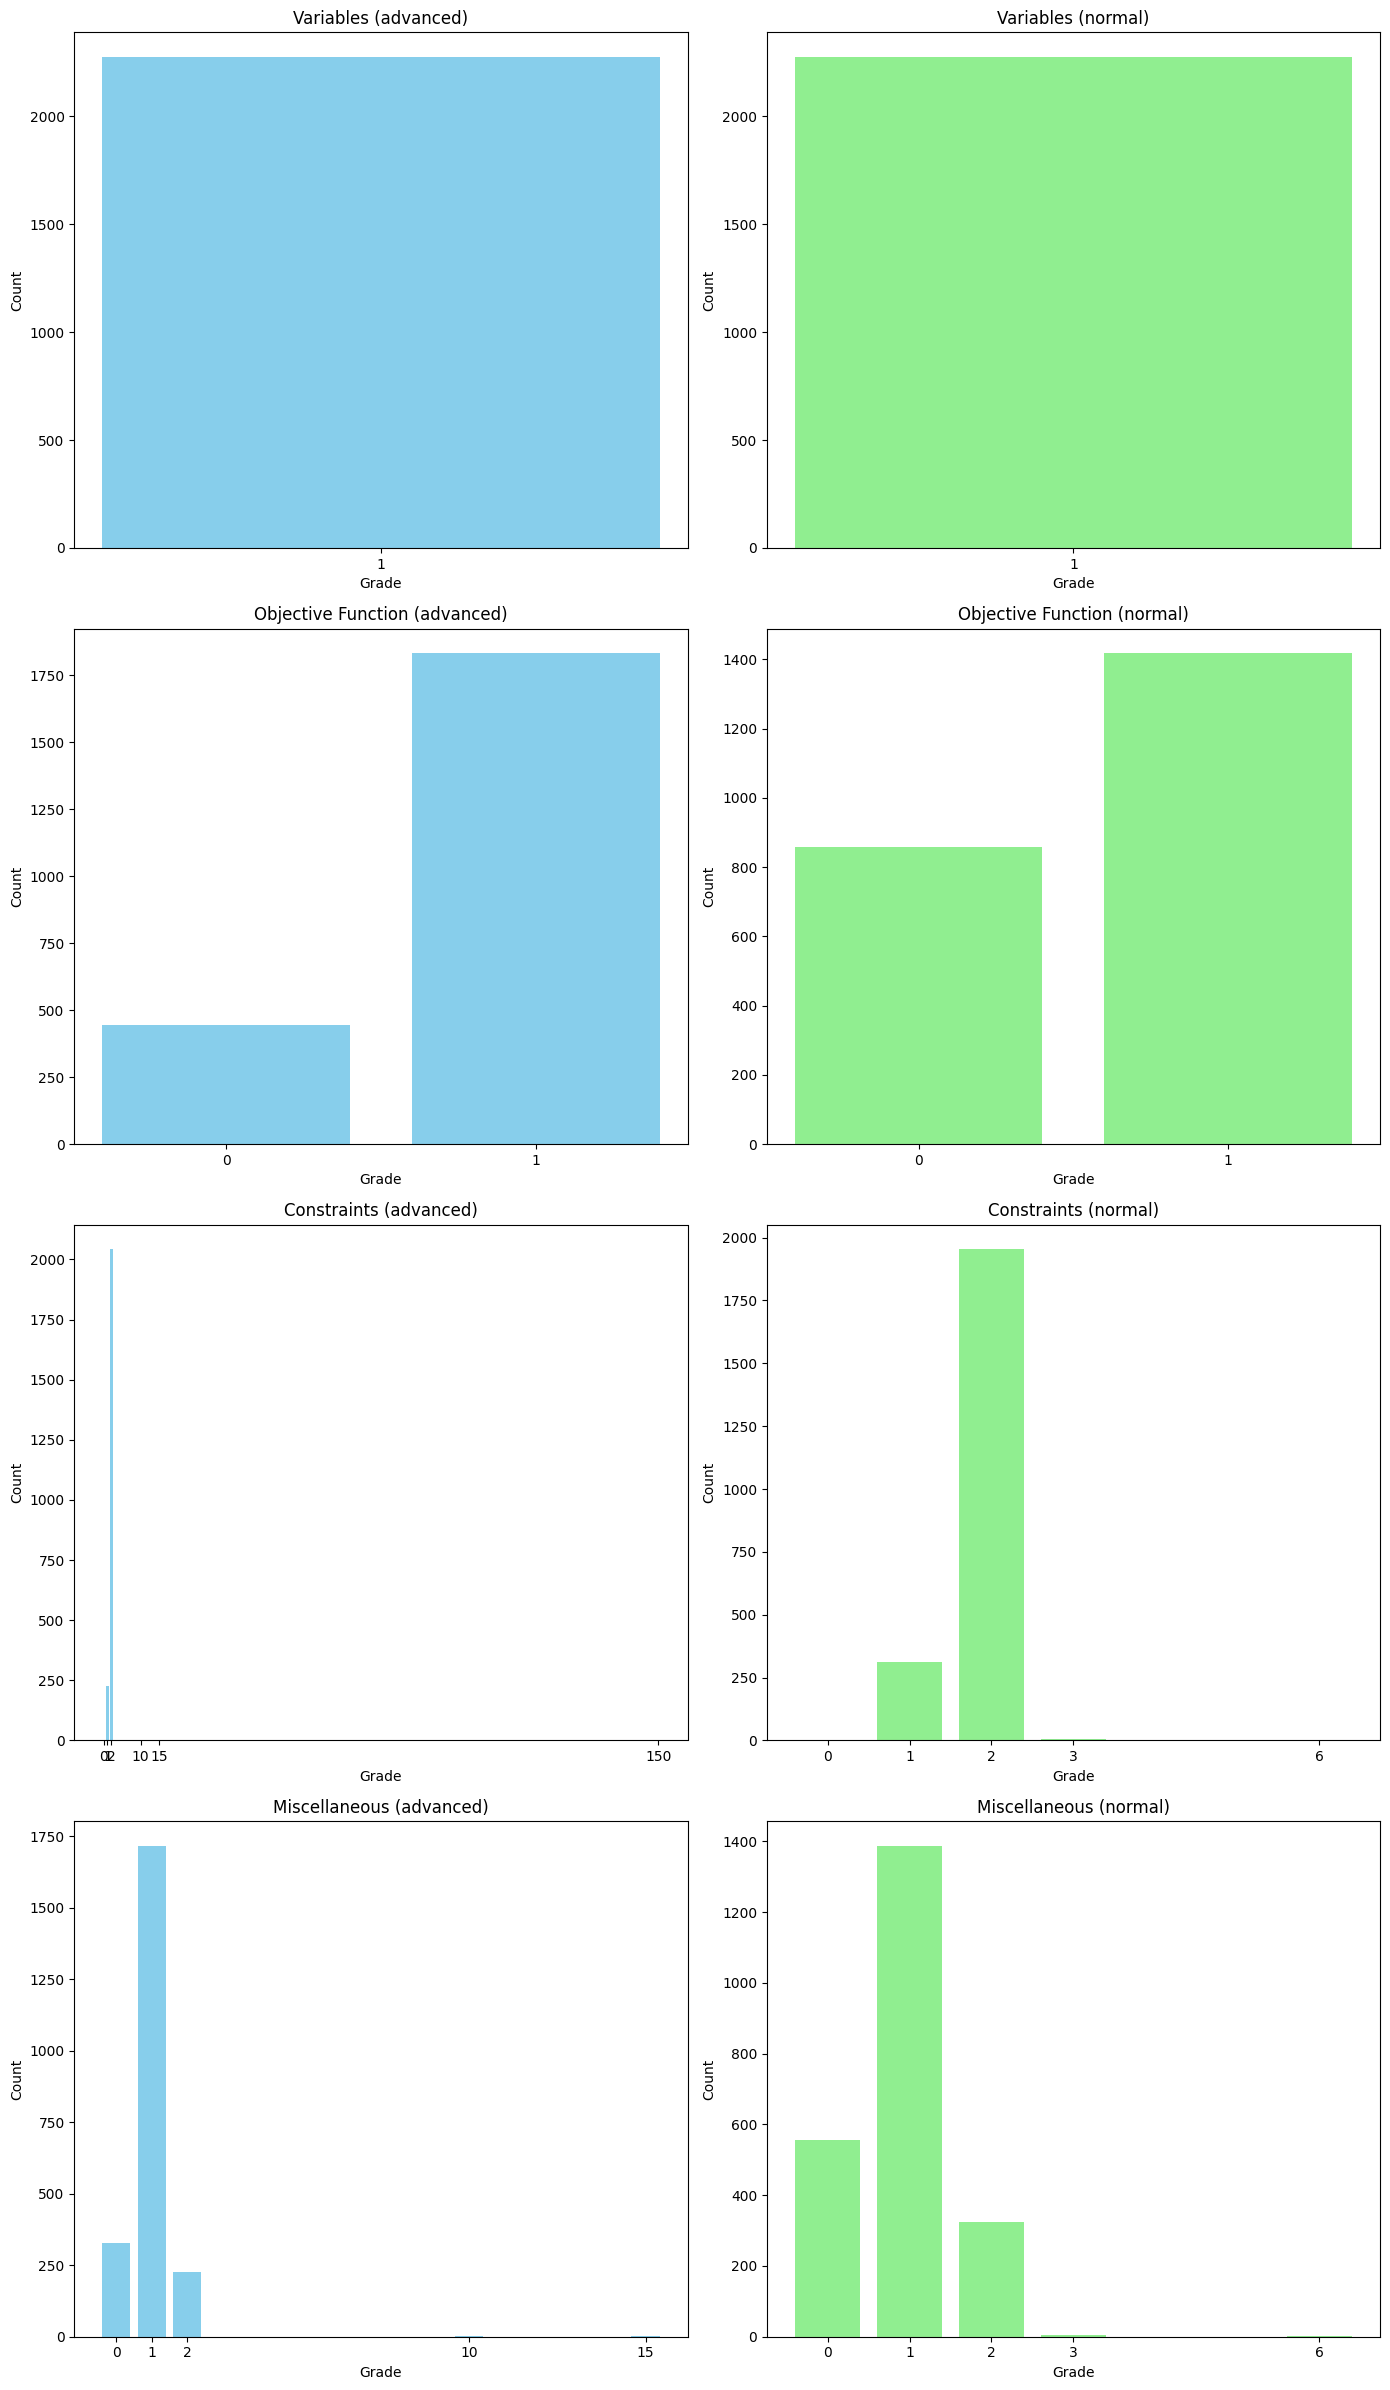

Category: Variables
Advanced Average Final Grade for Variables: 1.0
Advanced Grade Distribution for Variables:
parsed_scores
1    2275
Name: count, dtype: int64
Normal Average Final Grade for Variables: 1.0
Normal Grade Distribution for Variables:
parsed_scores
1    2275
Name: count, dtype: int64
Category: Objective Function
Advanced Average Final Grade for Objective Function: 0.8052747252747253
Advanced Grade Distribution for Objective Function:
parsed_scores
0     443
1    1832
Name: count, dtype: int64
Normal Average Final Grade for Objective Function: 0.6232967032967033
Normal Grade Distribution for Objective Function:
parsed_scores
0     857
1    1418
Name: count, dtype: int64
Category: Constraints
Advanced Average Final Grade for Constraints: 1.9806593406593407
Advanced Grade Distribution for Constraints:
parsed_scores
0         1
1       227
2      2042
10        3
15        1
150       1
Name: count, dtype: int64


C:\Users\jagod\AppData\Local\Temp\ipykernel_23076\1879726833.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_advanced['parsed_scores'] = filtered_df_advanced['llm_score_advanced'].apply(convert_response_to_list)
C:\Users\jagod\AppData\Local\Temp\ipykernel_23076\1879726833.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_normal['parsed_scores'] = filtered_df_normal['llm_score_normal'].apply(convert_response_to_list)
C:\Users\jagod\AppData\Local\Temp\ipykernel_23076\1879726833

Normal Average Final Grade for Constraints: 1.8641758241758242
Normal Grade Distribution for Constraints:
parsed_scores
0       2
1     314
2    1953
3       5
6       1
Name: count, dtype: int64
Category: Miscellaneous
Advanced Average Final Grade for Miscellaneous: 0.9771428571428571
Advanced Grade Distribution for Miscellaneous:
parsed_scores
0      328
1     1718
2      225
10       1
15       3
Name: count, dtype: int64
Normal Average Final Grade for Miscellaneous: 0.9054945054945055
Normal Grade Distribution for Miscellaneous:
parsed_scores
0     556
1    1388
2     324
3       6
6       1
Name: count, dtype: int64


C:\Users\jagod\AppData\Local\Temp\ipykernel_23076\1879726833.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_advanced['parsed_scores'] = filtered_df_advanced['llm_score_advanced'].apply(convert_response_to_list)
C:\Users\jagod\AppData\Local\Temp\ipykernel_23076\1879726833.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_normal['parsed_scores'] = filtered_df_normal['llm_score_normal'].apply(convert_response_to_list)


In [76]:
validate_final_grade(df_manual, score=0, title="hardcoded")

C:\Users\jagod\AppData\Local\Temp\ipykernel_23076\1879726833.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_advanced['parsed_scores'] = filtered_df_advanced['llm_score_advanced'].apply(convert_response_to_list)
C:\Users\jagod\AppData\Local\Temp\ipykernel_23076\1879726833.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_normal['parsed_scores'] = filtered_df_normal['llm_score_normal'].apply(convert_response_to_list)
C:\Users\jagod\AppData\Local\Temp\ipykernel_23076\1879726833

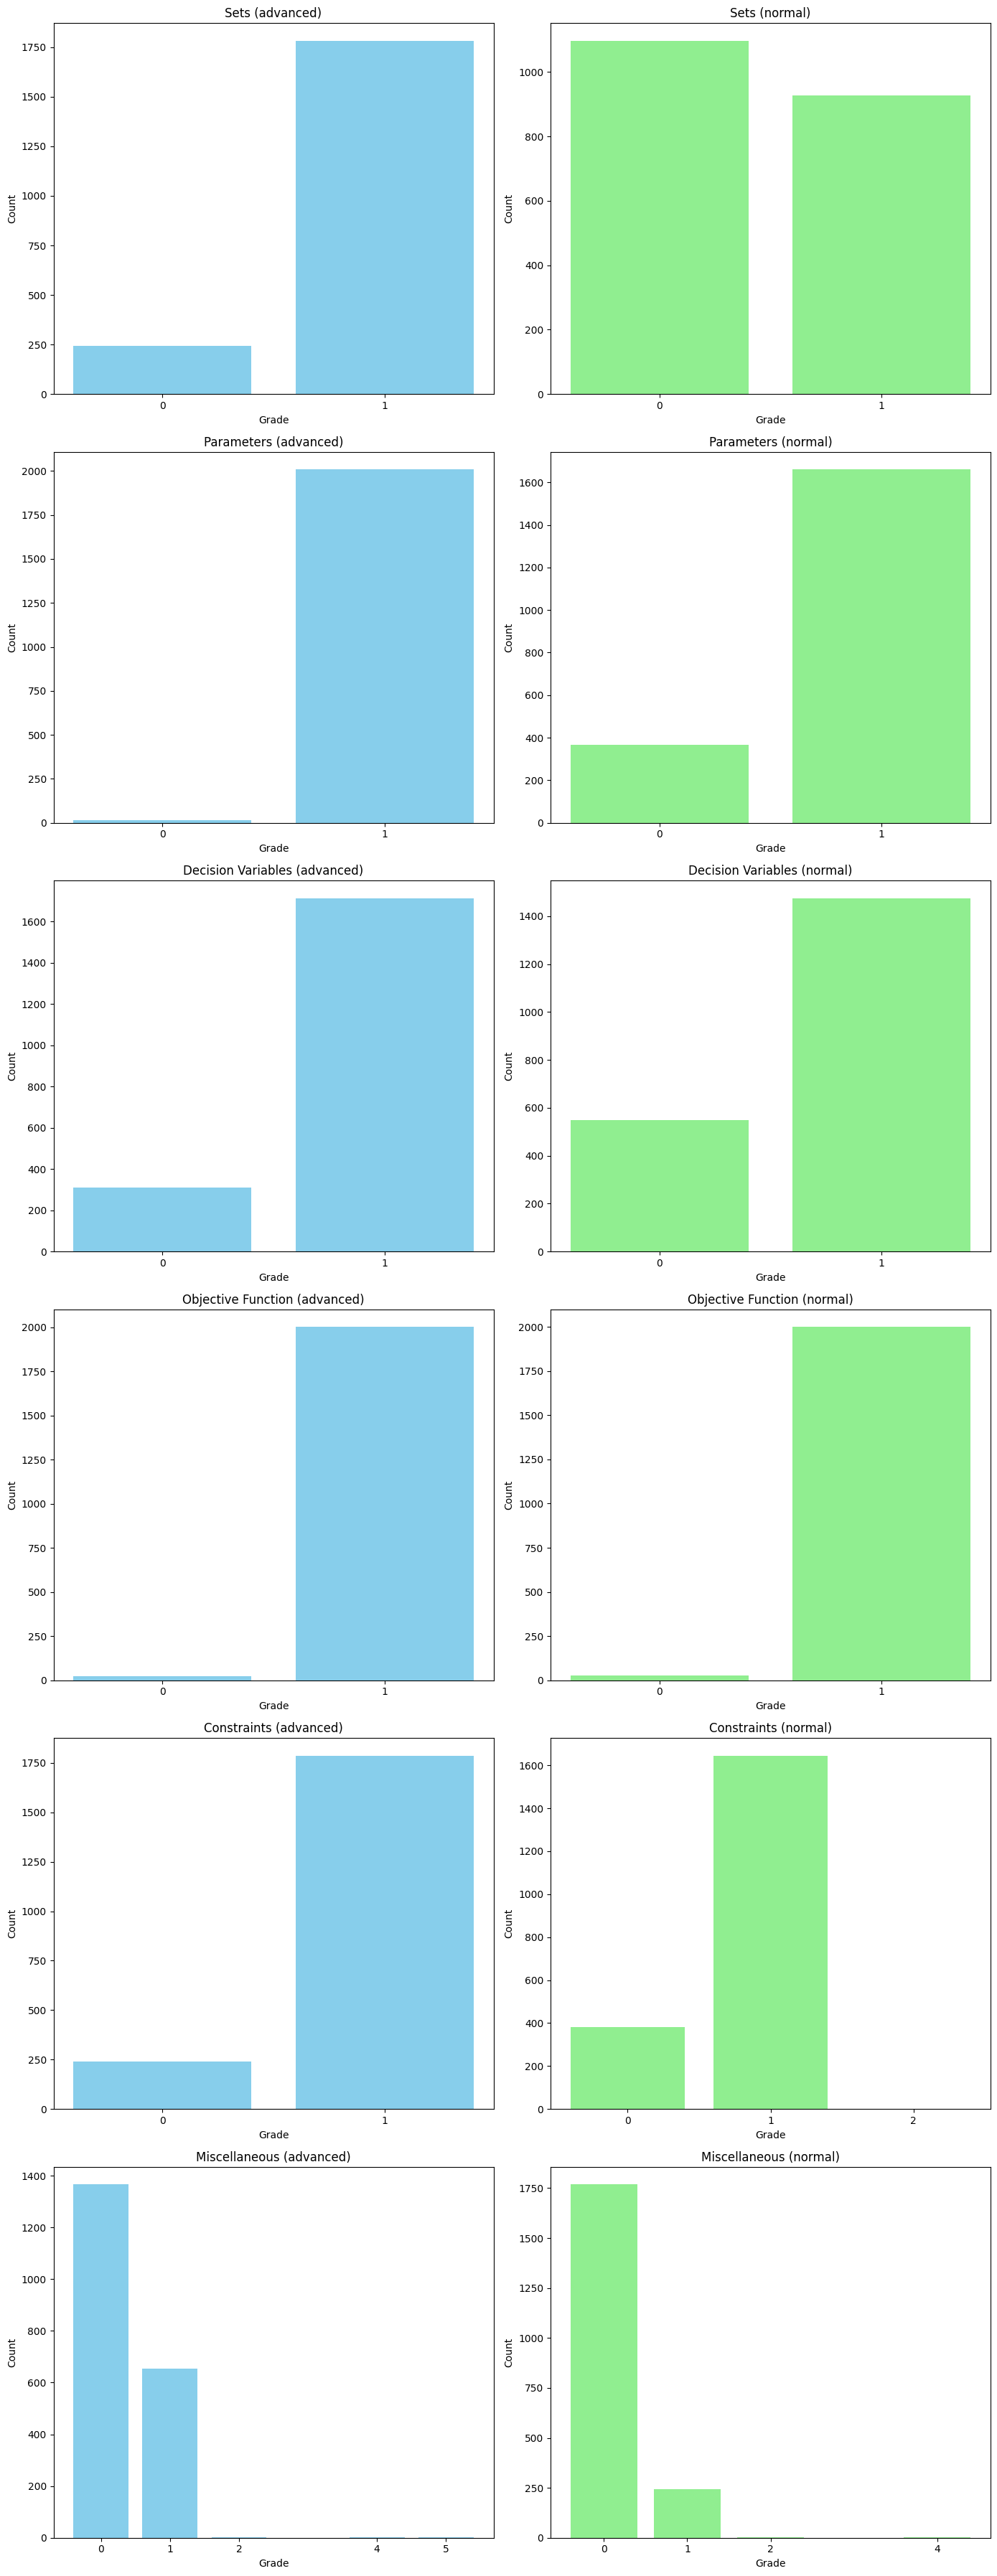

Category: Sets
Advanced Average Final Grade for Sets: 0.88
Advanced Grade Distribution for Sets:
parsed_scores
0     243
1    1782
Name: count, dtype: int64
Normal Average Final Grade for Sets: 0.4582716049382716
Normal Grade Distribution for Sets:
parsed_scores
0    1097
1     928
Name: count, dtype: int64
Category: Parameters
Advanced Average Final Grade for Parameters: 0.9916049382716049
Advanced Grade Distribution for Parameters:
parsed_scores
0      17
1    2008
Name: count, dtype: int64
Normal Average Final Grade for Parameters: 0.8197530864197531
Normal Grade Distribution for Parameters:
parsed_scores
0     365
1    1660
Name: count, dtype: int64
Category: Decision Variables
Advanced Average Final Grade for Decision Variables: 0.845925925925926
Advanced Grade Distribution for Decision Variables:


C:\Users\jagod\AppData\Local\Temp\ipykernel_23076\1879726833.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_advanced['parsed_scores'] = filtered_df_advanced['llm_score_advanced'].apply(convert_response_to_list)
C:\Users\jagod\AppData\Local\Temp\ipykernel_23076\1879726833.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_normal['parsed_scores'] = filtered_df_normal['llm_score_normal'].apply(convert_response_to_list)
C:\Users\jagod\AppData\Local\Temp\ipykernel_23076\1879726833

parsed_scores
0     312
1    1713
Name: count, dtype: int64
Normal Average Final Grade for Decision Variables: 0.7283950617283951
Normal Grade Distribution for Decision Variables:
parsed_scores
0     550
1    1475
Name: count, dtype: int64
Category: Objective Function
Advanced Average Final Grade for Objective Function: 0.988641975308642
Advanced Grade Distribution for Objective Function:
parsed_scores
0      23
1    2002
Name: count, dtype: int64
Normal Average Final Grade for Objective Function: 0.9871604938271605
Normal Grade Distribution for Objective Function:
parsed_scores
0      26
1    1999
Name: count, dtype: int64
Category: Constraints
Advanced Average Final Grade for Constraints: 0.8819753086419753
Advanced Grade Distribution for Constraints:
parsed_scores
0     239
1    1786
Name: count, dtype: int64
Normal Average Final Grade for Constraints: 0.8128395061728395
Normal Grade Distribution for Constraints:
parsed_scores
0     380
1    1644
2       1
Name: count, dtype: int64


C:\Users\jagod\AppData\Local\Temp\ipykernel_23076\1879726833.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_advanced['parsed_scores'] = filtered_df_advanced['llm_score_advanced'].apply(convert_response_to_list)
C:\Users\jagod\AppData\Local\Temp\ipykernel_23076\1879726833.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_normal['parsed_scores'] = filtered_df_normal['llm_score_normal'].apply(convert_response_to_list)
C:\Users\jagod\AppData\Local\Temp\ipykernel_23076\1879726833

In [77]:
validate_final_grade(df_manual, score=1, title="parameters")

In [79]:
df_manual.to_excel('all_trained.xlsx', index=False, engine='openpyxl')

print("Dane zostały zapisane w formacie XLSX do pliku.")

Dane zostały zapisane w formacie XLSX do pliku.
